# Midterm 2

# Time Limit - 2.30 pm to 6.30 pm

# 20 + 20 - 40 Marks

### Instructions

- The exam must be submitted on D2L by 6.30pm. No exceptions here. Only a single .ipynb file

- Most Important - Your submitted code should not match a code from the internet. If it does, it is a straight 0.

- The grades for Midterm1 and Midterm2, both will be considered and i will average out the grades.

- You must submit individually You will be liable for penalties if your work matches exactly the other person in your class or from the internet. So be careful.

## Problem 1
### The relevant Dataset (CIFAR 100) have been described below.




This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

- Images have low resolution (32x32). 

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

Read the website thoroughly.

The dataset can be directly fetched from Keras.io Website for easy incorporation into your code.
https://keras.io/api/datasets/cifar100/

In [221]:
#import of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import warnings
warnings.filterwarnings ("ignore") # turn off warning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import image as mpimg

### CIFAR-100 Image label detection of provided images

### Choose PCA+Random Forest+XGBoost And apply the techniques to the CIFAR-100 Dataset to Classify the Images.

### Apply PCA for reducing Dimensions. [5 Marks]
### Apply Random Forest with AdaBoost for model creation. [5 Marks].
### Recall or Precision Value? Which one should be optimised?? Show your optimised confusion matrix. [5 Marks]

### Download the 4 images provided on D2L. These images are of television,camel,wardrobe, and truck. Create a validation dataset using these images and predict the labels using the model of CIFAR-100 created by you as above. [5 Marks]

## Importing Data

In [387]:
# import dataset from keras
import tensorflow as tf
from tensorflow import keras
df = tf.keras.datasets.cifar100.load_data(label_mode="fine") # import dataset

In [388]:
df

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [389]:
##metadata labels
labels= ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
pd.DataFrame(labels, columns=['Fine-Labels'])

,Fine-Labels
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver
...,...
95,whale
96,willow_tree
97,wolf
98,woman


## Splitting of Data

In [390]:
# splitting dataset into train and test
(X_train, y_train), (X_test, y_test) = df
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

## Exploratory Analysis 

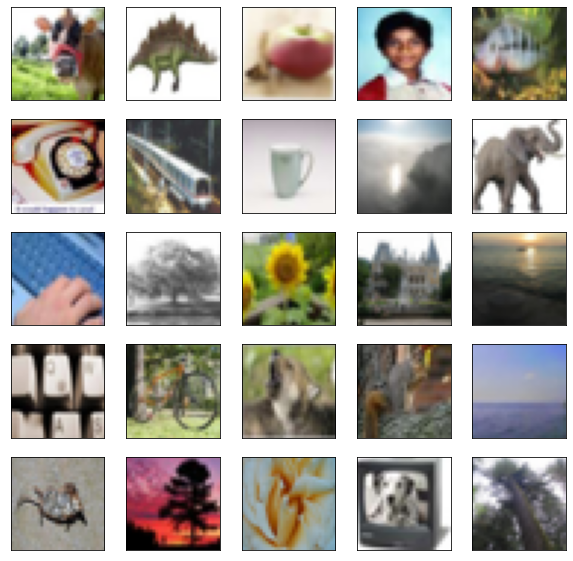

In [391]:
#to show 25 sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why need the extra index
plt.show()

In [392]:
#flattening dataset for analysis (width x height x depth)
X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)

In [393]:
#checking dimensions
display(X_train.shape, X_train.dtype) # 50k images  
display(X_test.shape, X_test.dtype) # 10k images  
display(y_train.shape, y_train.dtype) # 50k 
display(y_test.shape, y_test.dtype) # 10k 

(50000, 3072)

dtype('uint8')

(10000, 3072)

dtype('uint8')

(50000, 1)

dtype('int64')

(10000, 1)

dtype('int64')

In [394]:
#100 classes with 500 records each
unique, counts = np.unique(y_train, return_counts=True)
display(unique, counts)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500])

## Scaling of Data

In [395]:
from sklearn.preprocessing import StandardScaler

In [396]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Transform both training set and the test set.
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

## Perform the PCA

In [397]:
from sklearn.decomposition import PCA

In [398]:
#performing pca to training data
pca = PCA(.90)
pca.fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)

In [399]:
#showing the number of components for .90 cut-off
print("No. of components: ", pca.n_components_)

No. of components:  90


In [400]:
#showing the individual variance of 90 components  which is around 90% or 10% lost of information
print("Explained variance in each component \n:",pca.explained_variance_ratio_)

Explained variance in each component 
: [0.31675519 0.09102129 0.07618838 0.05641249 0.03620916 0.03066318
 0.02204972 0.01965033 0.01710622 0.01218575 0.0120163  0.01190373
 0.0106774  0.0086584  0.008289   0.00781895 0.00744041 0.0069085
 0.00684522 0.00626766 0.00528898 0.00520365 0.00496522 0.00472358
 0.00421545 0.00412763 0.00407156 0.00358994 0.00347005 0.00331051
 0.00318218 0.00293229 0.00277565 0.00268578 0.00264888 0.00254029
 0.00252362 0.00240149 0.00231753 0.00231535 0.0022525  0.00211956
 0.00200625 0.00198886 0.00197836 0.00197025 0.00185828 0.00180074
 0.00175215 0.00173669 0.00171614 0.00165422 0.00159109 0.00155644
 0.00154909 0.00152362 0.00149382 0.00144339 0.00141677 0.00140931
 0.00137943 0.00134043 0.00131981 0.0012776  0.00124907 0.0012247
 0.00121842 0.00114234 0.00113688 0.0011204  0.00111428 0.00109755
 0.00103961 0.00103002 0.00100936 0.00098973 0.0009686  0.00095411
 0.00093485 0.00092746 0.00091559 0.00090417 0.00088509 0.00088323
 0.00086227 0.00085529 0

#### Apply PCA to test Data

In [401]:
X_test_pca = pca.transform(X_test_sc)

## Perform the Random Forest with XGBoost

## Accuracy Rate/Precision/Recall results: 
Under this model the test data accuracy rate is 14.07%.
The precision has weighted average rate of 13% while recall has 14%. Based on these, I can say that recall is the accurate measure in image classification.

In [46]:
pip install xgboost #install XGBoost

     |████████████████████████████████| 1.7 MB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [412]:
#import libraries
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn import metrics

In [413]:
# define the parameters for XGBRF
xgb = xgb.XGBRFClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10) 

#### Fitting the model to train data

In [440]:
xgb_model = xgb.fit(X_train_pca, y_train)

#### Prediction 

In [441]:
y_pred1=xgb_model.predict(X_test_pca) 

#### Check accuracy rate in test data

In [437]:
print("Accuracy rate:",metrics.accuracy_score(y_test, y_pred1)) #14.07%

Accuracy rate: 0.1407


## Confusion Matrix

In [442]:
print(metrics.confusion_matrix(y_test, y_pred1))

[[39  4  0 ...  0  0  0]
 [ 2 28  0 ...  0  1  1]
 [ 4  5  1 ...  2  4  1]
 ...
 [ 0  4  1 ...  2  1  0]
 [ 2  2  0 ...  0  2  1]
 [ 3  2  0 ...  0  0 13]]


## Precion and Recall

In [443]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.18      0.39      0.25       100
           1       0.13      0.28      0.18       100
           2       0.05      0.01      0.02       100
           3       0.08      0.04      0.05       100
           4       0.50      0.01      0.02       100
           5       0.15      0.06      0.09       100
           6       0.16      0.07      0.10       100
           7       0.11      0.24      0.15       100
           8       0.26      0.09      0.13       100
           9       0.13      0.22      0.16       100
          10       0.25      0.02      0.04       100
          11       0.27      0.03      0.05       100
          12       0.09      0.05      0.06       100
          13       0.13      0.07      0.09       100
          14       0.09      0.10      0.10       100
          15       0.00      0.00      0.00       100
          16       0.20      0.16      0.18       100
          17       0.13    

## Perform RandomForest with ADA Boost

## Accuracy Rate/Precision/Recall results: 
Under this model the test data accuracy rate is 20.64%.
The precision has weighted average rate of 20% while recall has 22%. Based on these, I can say that recall is the accurate measure in image classification.

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
#setting the parameters
rfc = RandomForestClassifier(n_estimators=10)
rfc_ada = AdaBoostClassifier(base_estimator=rfc,
                         learning_rate=1)

#### Fitting the model

In [75]:
# Train Adaboost Classifer
ada1 = rfc_ada.fit(X_train_pca, y_train.ravel())

#### Prediction

In [77]:
#using in test data
y_pred_ada=ada1.predict(X_test_pca)

#### Accuracy Rate in test data

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada)) #20.64

Accuracy: 0.2064


#### Confusion Matrix

In [28]:
print(metrics.confusion_matrix(y_test, y_pred_ada))

[[50  2  0 ...  0  0  0]
 [ 2 40  0 ...  1  2  0]
 [ 1  0  7 ...  3  5  0]
 ...
 [ 0  0  1 ... 19  1  1]
 [ 3  0  4 ...  0  7  0]
 [ 0  0  2 ...  0  2 23]]


#### Precision and Recall

In [29]:
print(metrics.classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47       100
           1       0.32      0.40      0.36       100
           2       0.10      0.07      0.08       100
           3       0.08      0.05      0.06       100
           4       0.22      0.21      0.21       100
           5       0.13      0.10      0.11       100
           6       0.24      0.17      0.20       100
           7       0.17      0.16      0.17       100
           8       0.23      0.21      0.22       100
           9       0.40      0.35      0.37       100
          10       0.08      0.05      0.06       100
          11       0.16      0.12      0.14       100
          12       0.19      0.16      0.17       100
          13       0.11      0.10      0.10       100
          14       0.11      0.07      0.08       100
          15       0.13      0.07      0.09       100
          16       0.45      0.25      0.32       100
          17       0.21    

## Validation Testing

## Loading and Reading of Images

In [106]:
#current directory
cwd = os.getcwd()
cwd

'/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm'

In [135]:
pip install opencv-python

     |████████████████████████████████| 46.4 MB 54.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [419]:
import cv2
import os

df_val = []

# Load in the images
for filepath in os.listdir('/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm/Images'):
    df_val.append(cv2.imread('images/{0}'.format(filepath),1))
    
print(type(df_val[0]))

<class 'numpy.ndarray'>


In [420]:
df_val #showing array of validation dataset

[array([[[230, 232, 232],
         [230, 232, 232],
         [230, 232, 232],
         ...,
         [220, 225, 224],
         [220, 225, 224],
         [220, 225, 224]],
 
        [[230, 232, 232],
         [230, 232, 232],
         [230, 232, 232],
         ...,
         [220, 225, 224],
         [220, 225, 224],
         [220, 225, 224]],
 
        [[230, 232, 232],
         [230, 232, 232],
         [230, 232, 232],
         ...,
         [220, 225, 224],
         [220, 225, 224],
         [220, 225, 224]],
 
        ...,
 
        [[124, 162, 197],
         [122, 160, 195],
         [121, 159, 194],
         ...,
         [ 50,  90, 142],
         [ 51,  91, 143],
         [ 51,  91, 143]],
 
        [[127, 165, 200],
         [125, 163, 198],
         [124, 162, 197],
         ...,
         [ 50,  90, 142],
         [ 51,  91, 143],
         [ 51,  91, 143]],
 
        [[129, 167, 202],
         [127, 165, 200],
         [126, 164, 199],
         ...,
         [ 52,  92, 144],
  

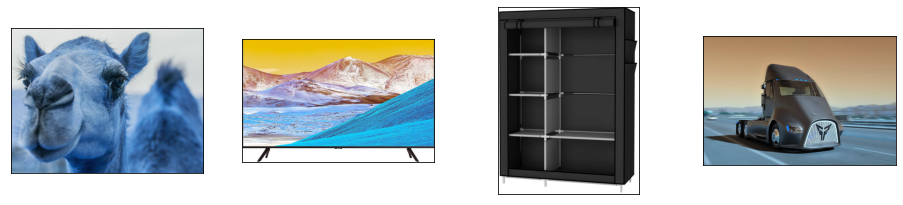

In [469]:
#to show 4 images
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df_val[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why need the extra index
plt.show()

## Prediction using Random Forest + XG Boost Model

## Based on the results of prediction, the model has wrongfully detected all the 4 images.

In [422]:
from keras.preprocessing import image
from PIL import Image

In [450]:
reshape_X = 3072
path = "/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm/Images/camel.jpg"
camel = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32),
    interpolation='nearest',
    keep_aspect_ratio=False,
)
camel = np.array(camel)
camel = camel / 255
camel = camel.reshape(1, reshape_X)
camel = camel.astype('float32')
camel = pca.transform(camel)
camel_pred = xgb_model.predict(camel)
camel_pred

array([99])

In [451]:
labels[99]  #camel was detected as worm

'worm'

In [452]:
reshape_X = 3072
path = "/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm/Images/television.jpg"
television = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32),
    interpolation='nearest',
    keep_aspect_ratio=False,
)
television = np.array(television)
television = television / 255
television= television.reshape(1, reshape_X)
television = television.astype('float32')
television = pca.transform(television)
television_pred = xgb_model.predict(television)
television_pred

array([17])

In [453]:
labels[17] #television was detected as castle

'castle'

In [454]:
reshape_X = 3072
path = "/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm/Images/truck.jpg"
truck = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32),
    interpolation='nearest',
    keep_aspect_ratio=False,
)
truck = np.array(truck)
truck = truck / 255
truck= truck.reshape(1, reshape_X)
truck = truck.astype('float32')
truck = pca.transform(truck)
truck_pred = xgb_model.predict(truck)
truck_pred

array([17])

In [455]:
labels[17] #truck was detected as castle

'castle'

In [465]:
reshape_X = 3072
path = "/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm/Images/wardrobe.jpg"
wardrobe = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(32,32),
    interpolation='nearest',
    keep_aspect_ratio=False,
)
wardrobe = np.array(wardrobe)
wardrobe = wardrobe / 255
wardrobe= wardrobe.reshape(1, reshape_X)
wardrobe = wardrobe.astype('float32')
wardrobe = pca.transform(wardrobe)
wardrobe_pred = xgb_model.predict(wardrobe)
wardrobe_pred

array([63])

In [466]:
labels[63] #wardrobe was detected as porcupine

'porcupine'

## Random Forest with ADABoost Prediction

## Based on the results of prediction, the model has wrongfully detected all the 4 images.

In [458]:
img1_pred = ada1.predict(camel)
img1_pred

array([60])

In [459]:
labels[60] #camel was detected as plain

'plain'

In [460]:
img2_pred = ada1.predict(television)
img2_pred

array([60])

In [461]:
labels[60] #television was detected as plain

'plain'

In [462]:
img3_pred = ada1.predict(truck)
img3_pred

array([71])

In [463]:
labels[71] #truck was detected as sea

'sea'

In [467]:
img4_pred = ada1.predict(wardrobe)
img4_pred

array([99])

In [468]:
labels[99] #wardrobe was detected as worm

'worm'

## Problem 2

## Perform Text Classification on the tweet data about COVID19. The tweets have been pulled from Twitter and manual tagging has been done then. The relevant CSV file have been attached in D2L.

## A sample .ipynb work file for this problem have been provided with spam.csv file (File used in Class). This file contains code for TF-IDF along with Gensim LDA package to find latent topics for the tweets (Topic Modelling). 

## Top of the code file contains relevent references for the code, please go through them. Few things are missing in the code that you need to apply to complete it.

### 1. Use the original Tweet File instead of my sample spam.csv file for your work. [2 Marks]
### 2. Properly remove punctuations, stopwords and any words of length 1 or 2. [3 Marks]
### 3. Get the wordcloud (as mentioned in the code) after apply step 1 (This has not been done in the code). [2 Marks]
### 4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation asshown in samplecode. [3 Marks]
### 5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.[10 Marks]


## Columns:
## 1) Location
## 2) Tweet At
## 3) Original Tweet
## 4) Sentiment (To be predicted)

In [305]:
import nltk
nltk.download('stopwords')

import gensim
from gensim import corpora, models

from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jombeetupas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [306]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

## Use the original Tweet File instead of my sample spam.csv file for your work

In [1532]:
tweets = pd.read_csv('/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm/Corona_NLP_train.csv')

In [1533]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [1534]:
# iterating the columns
for col in tweets.columns:
    print(col)

UserName
ScreenName
Location
TweetAt
OriginalTweet
Sentiment


In [1535]:
#include column length
tweets['length'] = tweets['OriginalTweet'].apply(len)
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


In [1536]:
tweets.length.describe()

count    41157.000000
mean       203.899142
std         68.513504
min         11.000000
25%        150.000000
50%        215.000000
75%        258.000000
max        350.000000
Name: length, dtype: float64

In [1537]:
#check dimensions
tweets.shape

(41157, 7)

## Properly remove punctuations, stopwords and any words of length 1 or 2

#### Checking of NAs

In [1538]:
tweets.isna().sum() #with NAs in location

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
length              0
dtype: int64

#### Removing of Punctuation

In [1539]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct 
tweets['OriginalTweet']=tweets['OriginalTweet'].apply(lambda x: remove_punctuation(x))
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elder...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,Me ready to go at supermarket during the COVID...,Extremely Negative,310


#### Tokenization and Lemmatization

In [1540]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

tweets['OriginalTweet'] = tweets['OriginalTweet'].apply(lambda x: lemmatize_text(x))
tweets.head

<bound method NDFrame.head of        UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      [MeNyr

#### Removing of stopwords

In [1541]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [1542]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
tweets['OriginalTweet'] = tweets['OriginalTweet'].apply(lambda x: remove_stopwords(x))
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...",Neutral,111
1,3800,48752,UK,16-03-2020,"[advice, Talk, neighbour, family, exchange, ph...",Positive,237
2,3801,48753,Vagabonds,16-03-2020,"[Coronavirus, Australia, Woolworths, give, eld...",Positive,131
3,3802,48754,NaN,16-03-2020,"[My, food, stock, one, empty, PLEASE, dont, pa...",Positive,306
4,3803,48755,NaN,16-03-2020,"[Me, ready, go, supermarket, COVID19, outbreak...",Extremely Negative,310


#### Remove words length 1 or 2

In [1543]:
def remove_len(text):
    text=[i for i in text if len(i) >= 3]
    return text
tweets['OriginalTweet'] = tweets['OriginalTweet'].apply(lambda x: remove_len(x))
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,length
0,3799,48751,London,16-03-2020,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...",Neutral,111
1,3800,48752,UK,16-03-2020,"[advice, Talk, neighbour, family, exchange, ph...",Positive,237
2,3801,48753,Vagabonds,16-03-2020,"[Coronavirus, Australia, Woolworths, give, eld...",Positive,131
3,3802,48754,NaN,16-03-2020,"[food, stock, one, empty, PLEASE, dont, panic,...",Positive,306
4,3803,48755,NaN,16-03-2020,"[ready, supermarket, COVID19, outbreak, Not, p...",Extremely Negative,310


## Get the wordcloud (as mentioned in the code) after apply step 1 (This has not been done in the code). [2 Marks]

In [1544]:
#word cloud visualization for the text
from wordcloud import WordCloud #visualization techniques for #frequently repeated texts

In [1545]:
#word cloud visualization for the tweets
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )

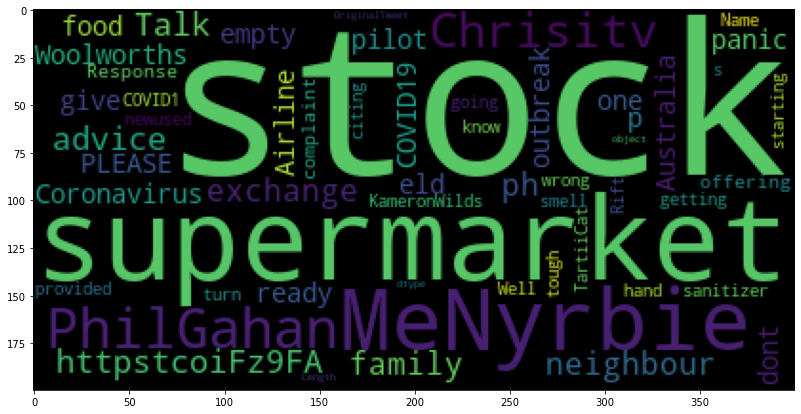

In [1546]:
text = str(tweets['OriginalTweet'])
wordcloud = wc.generate(text)
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

## Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation asshown in samplecode. 

In [1547]:
from gensim import corpora
from gensim.corpora import Dictionary
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [1548]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


## Perform LDA

In [1549]:
common_texts = tweets['OriginalTweet'].tolist()
# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

# Train the model on the corpus.
lda_model = LdaModel(common_corpus, num_topics=20, id2word = common_dictionary, passes = 2)

In [635]:
#explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.038*"insight" + 0.016*"senior" + 0.015*"export" + 0.015*"Help" + 0.014*"include" + 0.013*"Act" + 0.013*"easy" + 0.012*"raising" + 0.012*"gallon" + 0.012*"begin"


Topic: 1 
Words: 0.105*"price" + 0.030*"COVID19" + 0.026*"oil" + 0.025*"coronavirus" + 0.017*"market" + 0.015*"pandemic" + 0.014*"The" + 0.011*"demand" + 0.011*"due" + 0.011*"Covid19"


Topic: 2 
Words: 0.081*"food" + 0.024*"supply" + 0.021*"stock" + 0.019*"demand" + 0.012*"chain" + 0.011*"amp" + 0.011*"need" + 0.010*"Food" + 0.010*"bank" + 0.009*"The"


Topic: 3 
Words: 0.042*"store" + 0.039*"grocery" + 0.023*"coronavirus" + 0.017*"like" + 0.015*"people" + 0.014*"going" + 0.013*"SocialDistancing" + 0.012*"supermarket" + 0.012*"one" + 0.012*"get"


Topic: 4 
Words: 0.081*"coronavirus" + 0.063*"sanitizer" + 0.059*"hand" + 0.030*"toiletpaper" + 0.028*"COVID19" + 0.023*"paper" + 0.020*"covid19" + 0.020*"toilet" + 0.015*"mask" + 0.011*"Coronavirus"


Topic: 5 
Words: 0.025*"lower" + 0.020*"Supermarket" + 0.020*

In [636]:
#top topics
top_topics = lda_model.top_topics(common_corpus)
num_topics = 20
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -6.9082.
[([(0.041751668, 'store'),
   (0.039365195, 'grocery'),
   (0.022537863, 'coronavirus'),
   (0.016823985, 'like'),
   (0.014563164, 'people'),
   (0.014322855, 'going'),
   (0.013023083, 'SocialDistancing'),
   (0.012310843, 'supermarket'),
   (0.012140841, 'one'),
   (0.011831591, 'get'),
   (0.011507979, 'time'),
   (0.011193186, 'Covid19'),
   (0.01028674, 'mask'),
   (0.010106548, 'day'),
   (0.009747035, 'COVID19'),
   (0.008482803, 'thing'),
   (0.008021731, 'week'),
   (0.007850797, 'This'),
   (0.007004684, 'would'),
   (0.0068445434, 'see')],
  -2.856170327659675),
 ([(0.08086034, 'food'),
   (0.024490036, 'supply'),
   (0.020870136, 'stock'),
   (0.018504467, 'demand'),
   (0.011903044, 'chain'),
   (0.010796615, 'amp'),
   (0.0107610095, 'need'),
   (0.010445565, 'Food'),
   (0.010054678, 'bank'),
   (0.0092796665, 'The'),
   (0.009220265, 'people'),
   (0.008105021, 'panic'),
   (0.007902602, 'Covid'),
   (0.0076661245, 'month'),
   (0.0076

In [1261]:
# Compute Perplexity a measure of how good the model is. lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(common_corpus))  


Perplexity:  -13.400425415827897


In [637]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
visual = gensimvis.prepare(lda_model, common_corpus, common_dictionary)
visual

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.193533 -0.155545       1        1  10.535916
1      0.153989  0.191399       2        1  10.049543
2      0.162602 -0.024127       3        1   7.637567
18     0.142450 -0.128209       4        1   7.542342
7      0.110054  0.157223       5        1   6.907618
4      0.096373  0.011220       6        1   6.856328
15     0.127130 -0.081587       7        1   6.340681
11     0.093956 -0.010788       8        1   6.261435
19     0.115121 -0.153452       9        1   6.229522
8      0.094847  0.212358      10        1   5.705031
12     0.052830 -0.127650      11        1   4.522884
9      0.010922  0.010738      12        1   4.451338
10    -0.029920  0.208484      13        1   3.775316
6     -0.094074 -0.052750      14        1   2.781781
14    -0.134788  0.114147      15        1   2.615503
16    -0.183606 -0.045171      16        1   1.928544
13    -0.195605 -0.017679      17        1   1.854256
5     -0.201944 -0.055071      18        1   1.676878
17    -0.252183 -0.026760      19        1   1.242054
0     -0.261688 -0.026779      20        1   1.085462, topic_info=           Term         Freq        Total Category  logprob  loglift
430       price  9552.000000  9552.000000  Default  30.0000  30.0000
101       store  7872.000000  7872.000000  Default  29.0000  29.0000
56         food  6518.000000  6518.000000  Default  28.0000  28.0000
110     grocery  6473.000000  6473.000000  Default  27.0000  27.0000
26     shopping  3479.000000  3479.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
986      senior   136.368115   150.877752  Topic20  -4.1323   4.4221
4582  Emergency    51.884190    74.676250  Topic20  -5.0987   4.1590
2669       slow    65.067382   143.599840  Topic20  -4.8722   3.7316
2940      power    63.002645   153.463895  Topic20  -4.9045   3.6329
3415      bring    55.434146   201.979862  Topic20  -5.0325   3.2302

[1165 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5166      5  0.997383     000
645       2  0.994906    2019
1107      2  0.426994    2020
1107      6  0.236262    2020
1107     10  0.007383    2020
...     ...       ...     ...
744      11  0.025454   youre
1443      4  0.285525  youre
1443     11  0.176175  youre
1443     18  0.534600  youre
6963     20  0.975138    The

[2966 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 19, 8, 5, 16, 12, 20, 9, 13, 10, 11, 7, 15, 17, 14, 6, 18, 1])

## Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model

## Loading of Data

In [1605]:
tweets1 = pd.read_csv('/Users/jombeetupas/Desktop/Langara College/SEM 3/CPSC-4830/Assignment 4_Midterm/Corona_NLP_train.csv')

## Exploratory Analysis

In [1606]:
tweets1.info() #check data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [1607]:
tweets1.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [1608]:
# find categorical variables

categorical = [var for var in tweets1.columns if tweets1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['Location', 'TweetAt', 'OriginalTweet', 'Sentiment']


In [1609]:
# find numerical variables

numerical = [var for var in tweets1.columns if tweets1[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 2 numerical variables

The numerical variables are : ['UserName', 'ScreenName']


Class 0: 11422
Class 1: 9917
Proportion: 1.15 : 1


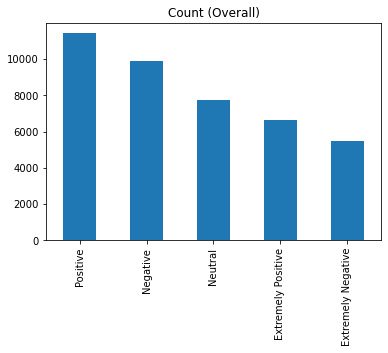

In [1610]:
#Checking Data Imabalanced/ Data is not extremely imbalanced. No need to do sampling.
sentiment_count = tweets1.Sentiment.value_counts()
print('Class 0:', sentiment_count[0])
print('Class 1:', sentiment_count[1])
print('Proportion:', round(sentiment_count[0] / sentiment_count[1], 2), ': 1')

sentiment_count.plot(kind='bar', title='Count (Overall)');

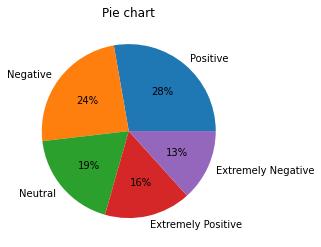

In [1611]:
sentiment_count.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

## Data Cleaning and Transformation

#### Convert TweetAt into day, year and month

In [1612]:
tweets1[["day", "month", "year"]] = tweets1["TweetAt"].str.split("-", expand = True)
print("\nNew DataFrame:")
print(tweets1)


New DataFrame:
       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gaha

#### Removing of unnecessary columns

In [1613]:
#delete these columns because they are not necessary in analysis and they are numerical in nature
del tweets1['UserName'] # index only , not important
del tweets1['ScreenName'] # numerical in nature, not important in analysis
del tweets1['Location'] # mostly missing values #8590
del tweets1['TweetAt'] # already converted/split into days,month and year

In [1614]:
tweets1.head

<bound method NDFrame.head of                                            OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia: Woolworths to give elde...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me, ready to go at supermarket during the #COV...  Extremely Negative   
...                                                  ...                 ...   
41152  Airline pilots offering to stock supermarket s...             Neutral   
41153  Response to complaint not provided citing COVI...  Extremely Negative   
41154  You know its getting tough when @KameronWilds...            Positive   
41155  Is it wrong that the smell of hand sanitizer i...             Neutral   
41156  @TartiiCat Well new/used Rift S are going for ...            Negative   

      day

#### Removing of punctuation

In [1615]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct 
tweets1['OriginalTweet']=tweets1['OriginalTweet'].apply(lambda x: remove_punctuation(x))
tweets1.head()

,OriginalTweet,Sentiment,day,month,year
0,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral,16,03,2020
1,advice Talk to your neighbours family to excha...,Positive,16,03,2020
2,Coronavirus Australia Woolworths to give elder...,Positive,16,03,2020
3,My food stock is not the only one which is emp...,Positive,16,03,2020
4,Me ready to go at supermarket during the COVID...,Extremely Negative,16,03,2020


#### Tokenization and Lemmatization

In [1616]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

tweets1['OriginalTweet'] = tweets1['OriginalTweet'].apply(lambda x: lemmatize_text(x))
tweets1.head

<bound method NDFrame.head of                                            OriginalTweet           Sentiment  \
0      [MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...             Neutral   
1      [advice, Talk, to, your, neighbour, family, to...            Positive   
2      [Coronavirus, Australia, Woolworths, to, give,...            Positive   
3      [My, food, stock, is, not, the, only, one, whi...            Positive   
4      [Me, ready, to, go, at, supermarket, during, t...  Extremely Negative   
...                                                  ...                 ...   
41152  [Airline, pilot, offering, to, stock, supermar...             Neutral   
41153  [Response, to, complaint, not, provided, citin...  Extremely Negative   
41154  [You, know, its, getting, tough, when, Kamero...            Positive   
41155  [Is, it, wrong, that, the, smell, of, hand, sa...             Neutral   
41156  [TartiiCat, Well, newused, Rift, S, are, going...            Negative   

      day

#### Removing of Stopwords

In [1617]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:11])
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
tweets1['OriginalTweet'] = tweets1['OriginalTweet'].apply(lambda x: remove_stopwords(x))
tweets1.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


,OriginalTweet,Sentiment,day,month,year
0,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...",Neutral,16,03,2020
1,"[advice, Talk, neighbour, family, exchange, ph...",Positive,16,03,2020
2,"[Coronavirus, Australia, Woolworths, give, eld...",Positive,16,03,2020
3,"[My, food, stock, one, empty, PLEASE, dont, pa...",Positive,16,03,2020
4,"[Me, ready, go, supermarket, COVID19, outbreak...",Extremely Negative,16,03,2020


#### Removing of words with lenght of less than 2

In [1618]:
def remove_len(text):
    text=[i for i in text if len(i) >= 3]
    return text
tweets1['OriginalTweet'] = tweets1['OriginalTweet'].apply(lambda x: remove_len(x))
tweets1.head()

,OriginalTweet,Sentiment,day,month,year
0,"[MeNyrbie, PhilGahan, Chrisitv, httpstcoiFz9FA...",Neutral,16,03,2020
1,"[advice, Talk, neighbour, family, exchange, ph...",Positive,16,03,2020
2,"[Coronavirus, Australia, Woolworths, give, eld...",Positive,16,03,2020
3,"[food, stock, one, empty, PLEASE, dont, panic,...",Positive,16,03,2020
4,"[ready, supermarket, COVID19, outbreak, Not, p...",Extremely Negative,16,03,2020


#### Convert uppercase to lowercase

In [1619]:
def lower_list(x):
    strings = []
    for string in x:
        strings.append(string.lower())
    return strings
tweets1['OriginalTweet'] = tweets1['OriginalTweet'].apply(lambda x: lower_list(x))
tweets1.head()

,OriginalTweet,Sentiment,day,month,year
0,"[menyrbie, philgahan, chrisitv, httpstcoifz9fa...",Neutral,16,03,2020
1,"[advice, talk, neighbour, family, exchange, ph...",Positive,16,03,2020
2,"[coronavirus, australia, woolworths, give, eld...",Positive,16,03,2020
3,"[food, stock, one, empty, please, dont, panic,...",Positive,16,03,2020
4,"[ready, supermarket, covid19, outbreak, not, p...",Extremely Negative,16,03,2020


#### Convert object to integer

In [1620]:
tweets1['day'] = tweets1['day'].astype(str).astype(int)
tweets1['month'] = tweets1['month'].astype(str).astype(int)
tweets1['year'] = tweets1['year'].astype(str).astype(int)

#### Convert multi-label target variable  to binary values

In [1621]:
#convert sentiment into binary values
def review_sentiment(Sentiment):
    # Replacing rating of Negative,Extremely Negative,Neutral with 0(not good) and Positive,Extremely Positive with 1(good) 
    if(Sentiment == "Negative" or Sentiment == "Extremely Negative" or Sentiment == "Neutral"):
        return 0
    else:
        return 1

tweets1['Sentiment'] = tweets1['Sentiment'].apply(review_sentiment)

In [1622]:
tweets1['Sentiment'].value_counts()

0    23111
1    18046
Name: Sentiment, dtype: int64

In [1623]:
#Creating the dependent variable class
factor = pd.factorize(tweets1['Sentiment'])
tweets1.Sentiment = factor[0]
definitions = factor[1]
print(tweets1.Sentiment.head(5))
print(definitions)

0    0
1    1
2    1
3    1
4    0
Name: Sentiment, dtype: int64
Int64Index([0, 1], dtype='int64')


In [1624]:
# iterating the columns
for col in tweets1.columns:
    print(col)

OriginalTweet
Sentiment
day
month
year


## Vectorization

In [1673]:
## implement BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
cv = CountVectorizer(ngram_range=(1,2))

In [1674]:
#transformed #takes some minutes
tweets1['OriginalTweet'] = str(tweets1['OriginalTweet'])
cv_tranformed = cv.fit_transform(tweets1['OriginalTweet']).toarray()

In [1675]:
tweets1['OriginalTweet'] = cv_tranformed

In [1676]:
tweets1.info() #checking of datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OriginalTweet  41157 non-null  int64
 1   Sentiment      41157 non-null  int64
 2   day            41157 non-null  int64
 3   month          41157 non-null  int64
 4   year           41157 non-null  int64
dtypes: int64(5)
memory usage: 1.6 MB


In [1677]:
#to make sure all variables are in numeric format
numerical = [var for var in tweets1.columns if tweets1[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['OriginalTweet', 'Sentiment', 'day', 'month', 'year']


In [1678]:
#defining X and Y
X = tweets1.drop('Sentiment', axis=1)
y = tweets1['Sentiment']

In [1679]:
X.head()

,OriginalTweet,day,month,year
0,1,16,3,2020
1,1,16,3,2020
2,1,16,3,2020
3,1,16,3,2020
4,1,16,3,2020


In [1680]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sentiment, dtype: int64

In [1681]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.3,random_state = 21)

In [1682]:
# check the shape of x_train and x_test

x_train1.shape, x_test1.shape

((28809, 4), (12348, 4))

In [1683]:
# check the shape of y_train and y_test
y_train1.shape, y_test1.shape

((28809,), (12348,))

In [1684]:
y_train1.head()

15728    0
28664    1
26694    1
14096    1
2633     1
Name: Sentiment, dtype: int64

## Perform Random Forest

In [1685]:
from sklearn.ensemble import RandomForestClassifier
rfc1_new = RandomForestClassifier(n_estimators=15, max_depth=2, random_state=0, criterion="entropy")
rfc_model1 = rfc1_new.fit(x_train1, y_train1)

In [1686]:
#prediction test data
ypred_test = rfc_model1.predict(x_test1)

In [1687]:
#prediction train data
ypred_train = rfc_model1.predict(x_train1)

In [1688]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, ypred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6893    0]
 [5455    0]]

True Positives(TP) =  6893

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  5455


## Model Accuracy

#### Accuracy Rate using Test Data

In [1689]:
ypred_test=rfc1_new.predict(x_test1)

print("Accuracy rate:",metrics.accuracy_score(y_test1, ypred_test))

Accuracy rate: 0.5582280531260123


#### Accuracy rate using Train Data

In [1690]:
ypred_train=rfc1_new.predict(x_train1)

print("Accuracy rate:",metrics.accuracy_score(y_train1, ypred_train))

Accuracy rate: 0.5629490784129959


#### Check for overfitting and underfitting

In [1691]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc1_new.score(x_train1, y_train1)))

print('Test set score: {:.4f}'.format(rfc1_new.score(x_test1, y_test1)))

Training set score: 0.5629
Test set score: 0.5582


## Confusion Matrix, Precision and Recall

In [1692]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, ypred_test)
cm

array([[6893,    0],
       [5455,    0]])

In [1693]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [1694]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [1695]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.5582


In [1696]:
from sklearn.metrics import classification_report, confusion_matrix

print(metrics.classification_report(ypred_test,y_test1))
print(metrics.confusion_matrix(ypred_test,y_test1))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     12348
           1       0.00      0.00      0.00         0

    accuracy                           0.56     12348
   macro avg       0.50      0.28      0.36     12348
weighted avg       1.00      0.56      0.72     12348

[[6893 5455]
 [   0    0]]


<AxesSubplot:>

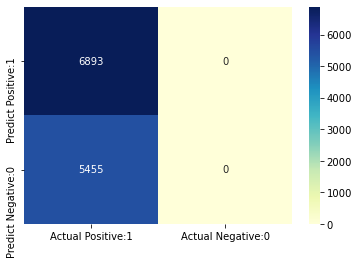

In [1697]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')